# MVP: Machine Learning Algorithm to predict Cars Price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

## Import Data

In [2]:
root = '../data/cleaned_cars.csv'

In [3]:
df = pd.read_csv(root)
df.head()

title       brand     model    type  year  \
0  Smart Fortwo Cabrio 52 Mhd Pure Aut.       SMART    FORTWO  sports  2014   
1           Volkswagen Scirocco 2.0 Tsi  VOLKSWAGEN  SCIROCCO  sports  2009   
2          Bmw Serie 2 218da Gran Coupé         BMW   SERIE 2  sports  2021   
3                     Bmw X4 Xdrive 20d         BMW        X4  sports  2017   
4                    Dodge Viper Srt-10       DODGE     VIPER  sports  2005   

     kms       city    gearbox  doors  seats  ...  height length  width  \
0  37125   Alicante  Automatic      2      2  ...     157    270    156   
1      0  Barcelona     Manual      3      4  ...     140    426    181   
2      0  Cantabria  Automatic      4      5  ...     142    453    180   
3  85000     Girona  Automatic      5      5  ...     162    467    188   
4  95017    Unknown  Automatic      2      2  ...     123    446    191   

  trunk_vol max_speed mixed_cons weight  tank_vol   acc  price  
0       203       145        4.3    780        33  13.7   5500  
1       292       235        7.6   1373        55   7.2  10900  
2       430       222        4.2   1545        42   8.5  36100  
3       500       212        5.4   1740        67   8.0  28000  
4       344       189       21.0   1546        70   3.9  27990  

[5 rows x 27 columns]

## Data Visualization

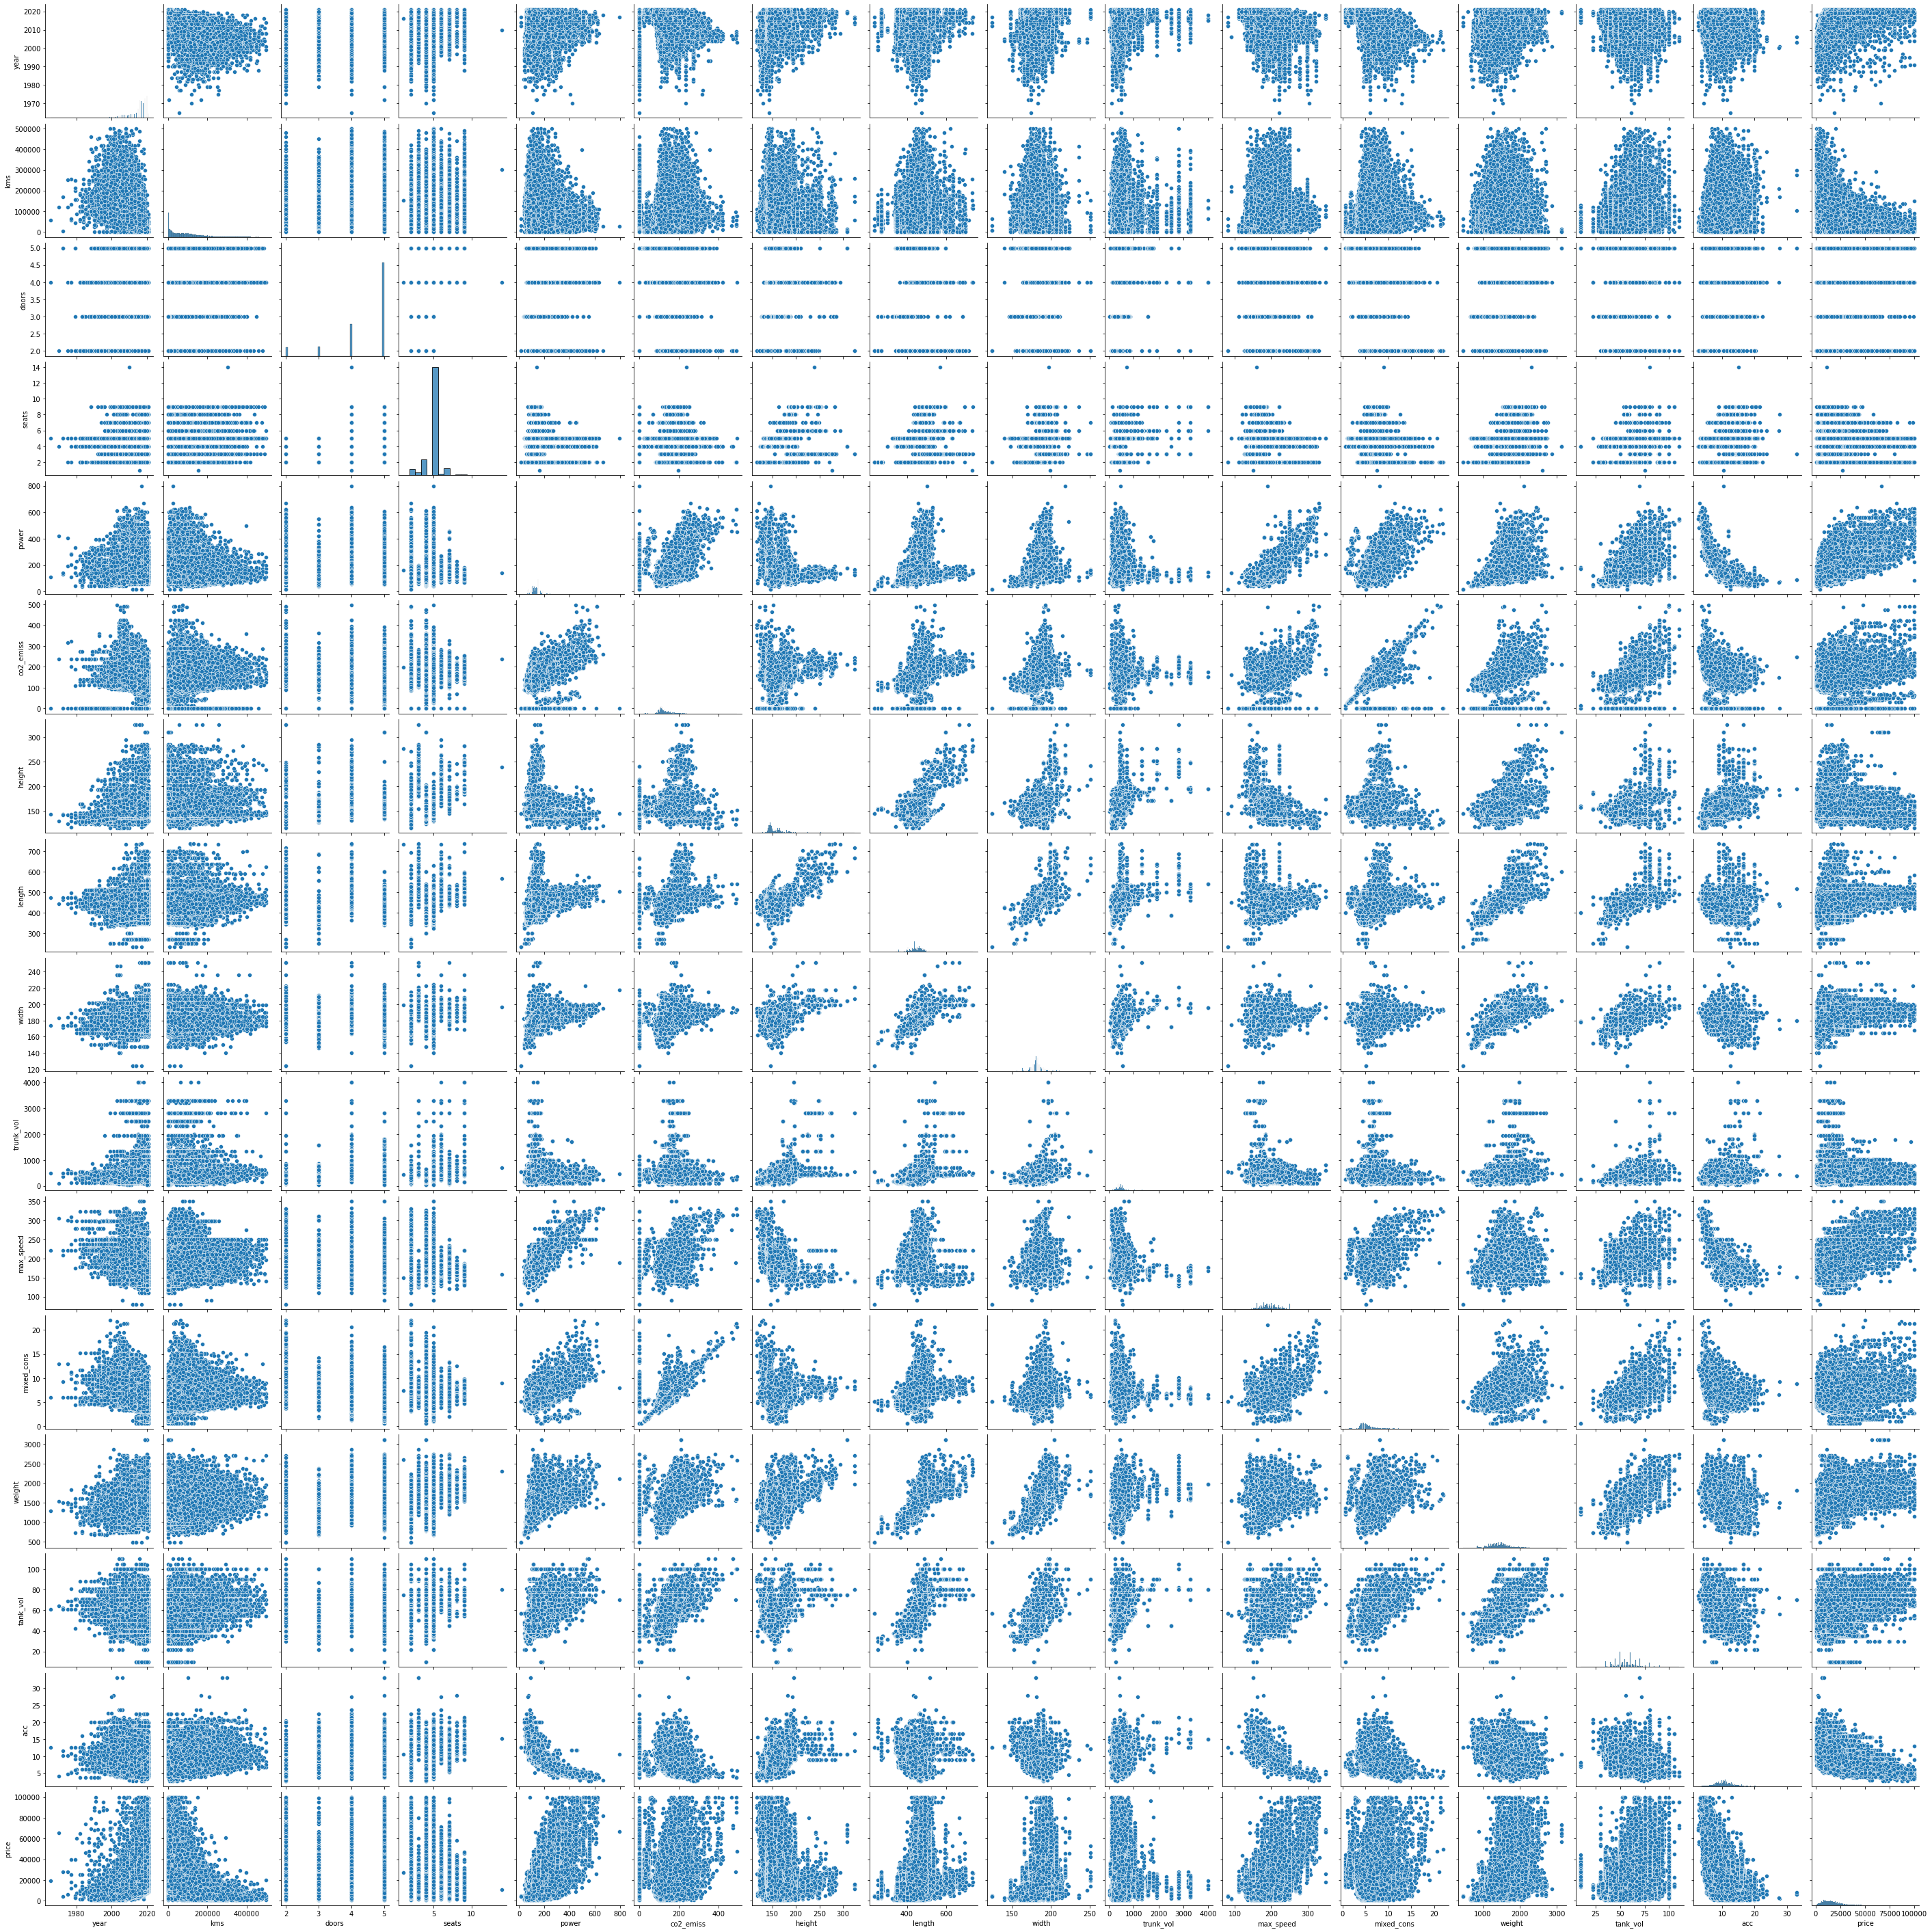

In [4]:
sns.pairplot(df)
plt.savefig('fig/06_pairplot.png')

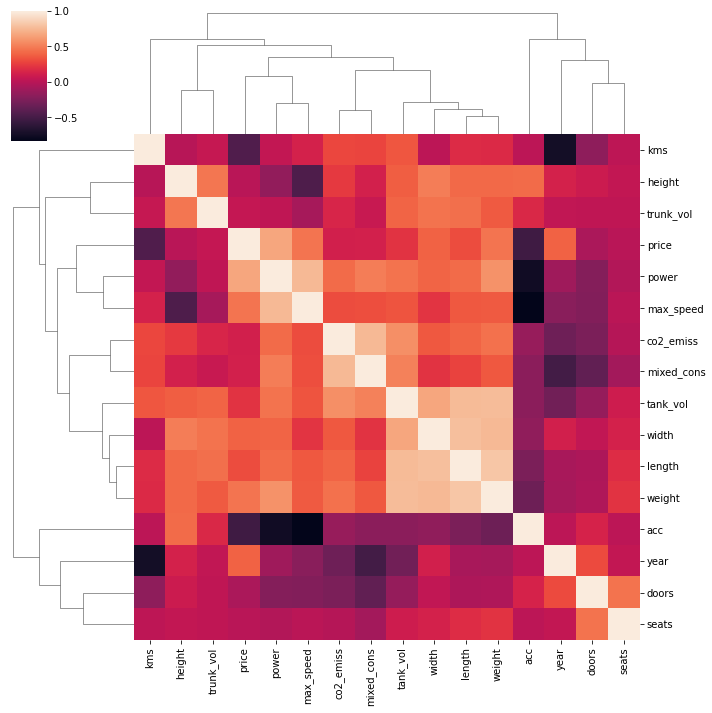

In [5]:
sns.clustermap(df.corr())
plt.savefig('fig/06_corr_matrix.png')

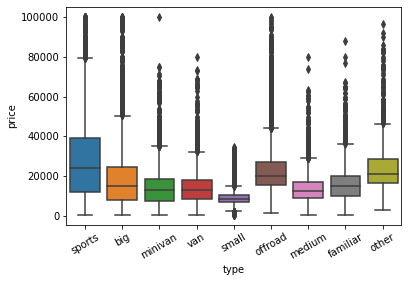

In [6]:
sns.boxplot(data=df, x='type', y='price')

plt.xticks(rotation=30)

plt.savefig('fig/06_prices_outlier.png')
plt.show()

We have detected a major outlier on the price that will be removed from the source

## Data Cleansing

In [7]:
import sys
sys.path.append('..')
from modules.car_cleanser import rm_outliers

In [8]:
df = rm_outliers(df)
df.price.max()

100000

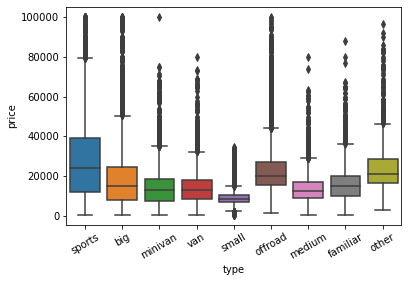

In [9]:
sns.boxplot(data=df, x='type', y='price')

plt.xticks(rotation=30)

plt.show()

In [10]:
df[df.kms == df.kms.max()]

title     brand    model type  \
9391                     Mercedes Clase S 350 Bt Aut.  MERCEDES  CLASE S  big   
10376                        Mercedes Clase E 270 Cdi  MERCEDES  CLASE E  big   
11423                                  Audi A4 1.9tdi      AUDI       A4  big   
11846         Mercedes Clase C 220cdi Avantgarde Aut.  MERCEDES  CLASE C  big   
25097  Renault Master 2.5dci Ch. Dcb. Volq. Largo 150   RENAULT   MASTER  van   

       year     kms       city    gearbox  doors  seats  ...  height length  \
9391   2014  500000      Alava  Automatic      4      5  ...     149    512   
10376  2001  500000    Navarra  Automatic      4      5  ...     144    482   
11423  1999  500000  Salamanca     Manual      4      5  ...     142    448   
11846  2008  500000   Alicante  Automatic      4      5  ...     145    458   
25097  2008  500000       Jaen     Manual      4      6  ...     234    623   

       width trunk_vol max_speed mixed_cons weight  tank_vol   acc  price  
9391     190       510       250        5.9   1955        70   6.8  19990  
10376    180       499       237        6.9   1630        66  11.5   3200  
11423    173       480       196        5.0   1200        54  11.3   1000  
11846    177       475       227        6.7   1605        66   8.4   2500  
25097    199      2800       140        9.0   2700       100  14.0   4500  

[5 rows x 27 columns]

## Data Modeling

### Price

In [11]:
# Dividing the data into target and features
features = df[df.select_dtypes('number').columns[:-1]]
target = df[df.columns[-1]]    # Price

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = lr.predict(X_test)

In [14]:
predictions

array([ 16443.19114309, -10280.42048589,  27489.35703884, ...,
        11365.32544253,  41113.1661068 ,  16631.40402297])

### Type

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Dividing the data into target and features
features_t = df[df.select_dtypes('number').columns]
target_t = df['type']    # Type

In [17]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(features_t, target_t)

tree = DecisionTreeClassifier()
tree.fit(X_train_t, y_train_t)

DecisionTreeClassifier()

In [18]:
predictions_t = tree.predict(X_test_t)

In [19]:
predictions_t

array(['van', 'familiar', 'van', ..., 'medium', 'familiar', 'small'],
      dtype=object)

## Model Evaluation

### Price

In [20]:
from modules.model_evaluator import eval_reg

In [21]:
eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.7458

RMSE = 6404.2700

MSE = 41014674.1906

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 4205.9156

EVS = 74.5801%



### Type
Multilabel classifier

In [22]:
from modules.model_evaluator import eval_cls

### MEASURES OF CLASSIFICATION MODEL ###
----------------------------------------

Accuracy score = 94.7441%

LogLoss cannot be applied to string.

Avg Precision score = 94.7204%

Recall score = 94.7441%

F1 score = 94.7320%

Confusion matrix:
[[2402    4    6    0    0    1    0    5    0]
 [   8  745    6    3    4    2    0    0    0]
 [   6    8 2277    7    4  122    1    0    0]
 [   0    2    4 2000   20    3    0    1   13]
 [   0    3    6   21 2200  145    0    5    1]
 [   0    2  123    1  157  138    0    0    0]
 [   0    0    1    1    0    0  690    1    0]
 [   2    0    3    2    2    1    0 1333    0]
 [   0    0    2   14    1    3    0    0 1320]]



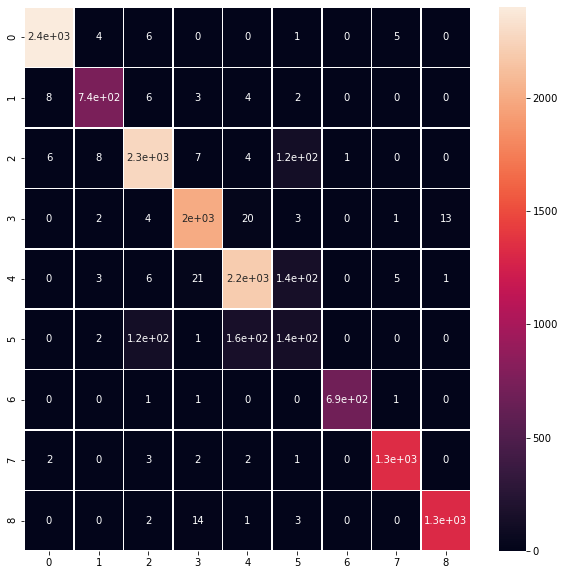

In [23]:
eval_cls(y_test_t, predictions_t)
plt.savefig('fig/06_confusion_matrix.png')